In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

Notes:
Starting urban pixels:
    GR:
    CS:

Starting risky development:
    GR:
    CS:

In [2]:
os.chdir(r'D:\GLISA-WWA\Paper_runs\Colorado_springs')
CSbasedf = pd.read_csv('basedf.csv')
CSinfilldf = pd.read_csv('infilldf.csv')
CSnofiredf = pd.read_csv('nofiredf.csv')
CSinfillnofiredf = pd.read_csv('infillnofiredf.csv')

os.chdir(r'D:\GLISA-WWA\Paper_runs\Grand_rapids')
GRbasedf = pd.read_csv('basedf.csv')
GRinfilldf = pd.read_csv('infilldf.csv')
GRnoflooddf = pd.read_csv('noflooddf.csv')
GRinfillnoflooddf = pd.read_csv('infillnoflooddf.csv')

88725.7
88017.92
93195.3
90292.82


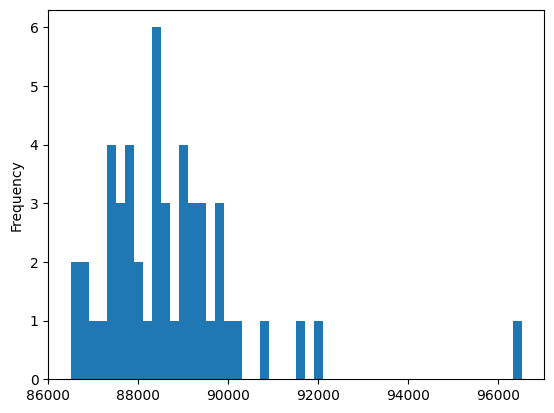

In [3]:
CSbasedf['risk_dev'].plot.hist(bins=50)
print(CSbasedf['risk_dev'].mean())
print(CSinfilldf['risk_dev'].mean())
print(CSnofiredf['risk_dev'].mean())
print(CSinfillnofiredf['risk_dev'].mean())

Grouped bar chart with all runs, clusters are ag, newurb, risk, bar colors are scenarios, 

In [4]:
CSbasedf['Scenario'] = 'baseline'
CSinfilldf['Scenario'] = 'infill'
CSnofiredf['Scenario'] = 'nofire'
CSinfillnofiredf['Scenario'] = 'infillnofire'

# Calculate amount of risky development newly placed by the model
CSbasedf['risk_dev_new'] = CSbasedf['risk_dev'] - 83776
CSinfilldf['risk_dev_new'] = CSinfilldf['risk_dev'] - 83776
CSnofiredf['risk_dev_new'] = CSnofiredf['risk_dev'] - 83776
CSinfillnofiredf['risk_dev_new'] = CSinfillnofiredf['risk_dev'] - 83776

GRbasedf['Scenario'] = 'baseline'
GRinfilldf['Scenario'] = 'infill'
GRnoflooddf['Scenario'] = 'noflood'
GRinfillnoflooddf['Scenario'] = 'infillnoflood'

# Calculate amount of risky development newly placed by the model
GRbasedf['risk_dev_new'] = GRbasedf['risk_dev'] - 88213
GRinfilldf['risk_dev_new'] = GRinfilldf['risk_dev'] - 88213
GRnoflooddf['risk_dev_new'] = GRnoflooddf['risk_dev'] - 88213
GRinfillnoflooddf['risk_dev_new'] = GRinfillnoflooddf['risk_dev'] - 88213

CSdf = pd.concat([CSbasedf, CSinfilldf, CSnofiredf, CSinfillnofiredf])
GRdf = pd.concat([GRbasedf, GRinfilldf, GRnoflooddf, GRinfillnoflooddf])

CSdf = CSdf.drop('Unnamed: 0', axis=1)
GRdf = GRdf.drop('Unnamed: 0', axis=1)

CSdf.head()

,run,ag_loss,forest_loss,risk_dev,newurb,Scenario,risk_dev_new
0,1,3404,3096,89367,67361,baseline,5591
1,2,2363,4018,89822,67084,baseline,6046
2,3,2942,3736,88354,67175,baseline,4578
3,4,3497,2086,87890,67084,baseline,4114
4,5,4521,3372,88516,67086,baseline,4740


In [2]:
os.chdir(r'D:\GLISA-WWA\Paper_runs\Colorado_springs')
CSdf = pd.read_csv('csdf_migration2.csv')

os.chdir(r'D:\GLISA-WWA\Paper_runs\Grand_rapids')
GRdf = pd.read_csv('grdf_migration2.csv')

GRdf['risk_dev_new'] = GRdf['risk_dev'] - 88213
CSdf['risk_dev_new'] = CSdf['risk_dev'] - 83776


scenario,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
ag_loss,3048.1250,3104.3125,3188.0625,2892.3125,3232.6875,3375.1875,3090.0625,3269.9375,3527.6875,3133.9375,...,3281.9375,3065.5625,3380.1875,3421.9375,3164.0000,3682.9375,3188.3125,3195.6875,3209.0000,3298.0000
forest_loss,3674.2500,3890.8125,3423.0625,4357.1250,4560.3750,3933.2500,3883.6875,4164.0000,5511.1250,3083.0625,...,4052.6250,3489.1875,4057.7500,4060.4375,3891.6250,4455.7500,3727.5625,4019.6875,3659.4375,4629.3750
risk_dev,89088.1250,89125.9375,89153.1875,90610.0000,90564.3750,89376.6250,89678.0000,89965.5625,90998.8125,88749.3125,...,89910.3750,89354.3125,90124.0000,90620.9375,89703.6875,90703.0625,89433.5625,89404.0625,89356.3125,90551.6875
newurb,66565.9375,66617.3750,67097.5625,66990.8750,66710.8750,66563.0000,66460.0625,66832.0625,66686.6250,67034.1875,...,66639.1250,66153.8750,66607.3750,66455.2500,66489.6875,67046.7500,67075.8125,66261.0625,66237.0625,66323.0000
risk_dev_new,5312.1250,5349.9375,5377.1875,6834.0000,6788.3750,5600.6250,5902.0000,6189.5625,7222.8125,4973.3125,...,6134.3750,5578.3125,6348.0000,6844.9375,5927.6875,6927.0625,5657.5625,5628.0625,5580.3125,6775.6875


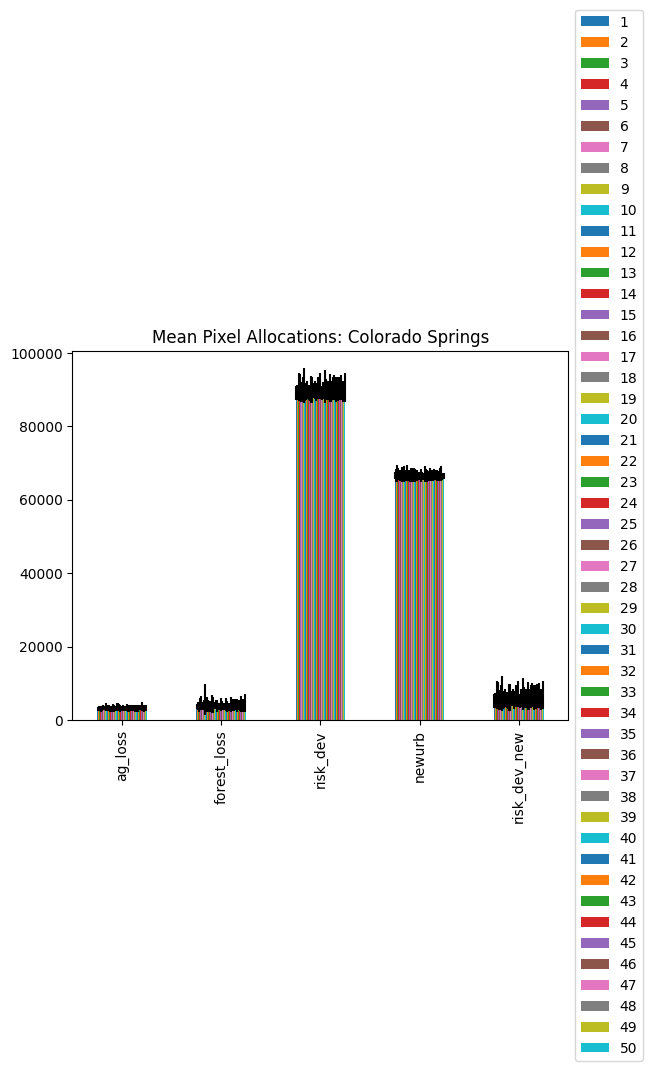

In [3]:
#list(CSdf.columns)
CSdf.drop('run', axis=1).groupby('scenario').mean().transpose().drop('Unnamed: 0').plot.bar(title = 'Mean Pixel Allocations: Colorado Springs',yerr=CSdf.drop('run', axis=1).groupby('scenario').std().transpose()).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
CSdf.drop('run', axis=1).groupby('scenario').mean().transpose().drop('Unnamed: 0').head()


scenario,baseline_migration_run,baseline_run,infill_migration_run,infill_noflood_migration_run,infill_noflood_run,infill_run,noflood_migration_run,noflood_run
ag_loss,77589.58,78327.34,66352.08,66099.08,66847.80,67065.56,77557.54,78404.22
forest_loss,35021.42,35283.38,44783.92,44693.12,44967.28,45161.64,34944.74,35100.46
risk_dev,90595.14,90633.68,91926.50,93817.56,93950.46,92026.36,92199.88,92194.46
newurb,123931.88,125064.92,123920.96,123926.96,125062.24,125150.38,123931.56,124990.60
risk_dev_new,2382.14,2420.68,3713.50,5604.56,5737.46,3813.36,3986.88,3981.46


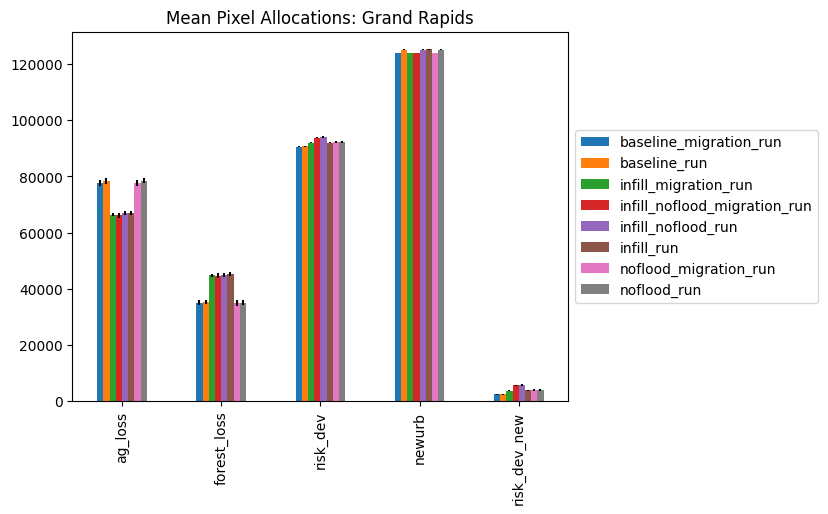

In [4]:
GRdf.drop('run', axis=1).groupby('scenario').mean().transpose().drop('Unnamed: 0').plot.bar(title = 'Mean Pixel Allocations: Grand Rapids', yerr=GRdf.drop('run', axis=1).groupby('scenario').std().transpose()).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
GRdf.drop('run', axis=1).groupby('scenario').mean().transpose().drop('Unnamed: 0').head()